<a href="https://colab.research.google.com/github/FaustoJuarez/ComputerArchitecture/blob/main/RiverFlowLevels_Neural_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neuralprophet

In [60]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet
import pickle
from datetime import datetime, date, timedelta

def load_data():
    return pd.read_csv('rivers_merged1-date.csv', sep = ';', header = 0,  parse_dates=True)

In [59]:
data = load_data()
data = data.dropna()
convert_dict = {'YEAR': str,
                'DOY': int, 
                'WS10M_MIN': float,
                'WS10M_MAX': float,
                'WS2M_MIN': float,
                'WS2M_MAX': float,
                'PS': float,
                'T2M': float,
                'TS': float,
                'RH2M': float,
                'T2M_RANGE': float,
                'QV2M': float,
                'PRECTOTCORR': float,
                'T2MDEW': float,
                'T2MWET': float,
                'T2M_MIN': float,
                'T2M_MAX': float,
                }
data = data.astype(convert_dict)
data.head()

KeyError: ignored

In [8]:
data['DATE']=''

In [9]:
data.head()

,YEAR,DOY,WS10M_MIN,WS10M_MAX,WS2M_MIN,WS2M_MAX,PS,T2M,TS,RH2M,T2M_RANGE,QV2M,PRECTOTCORR,T2MDEW,T2MWET,T2M_MIN,T2M_MAX,DATE
0,2000,1,0.71,5.98,0.45,4.38,91.34,22.93,22.75,51.94,11.90,9.64,1.14,12.03,17.48,17.00,28.89,
1,2000,2,0.43,4.66,0.19,3.45,91.27,23.31,23.73,52.62,12.09,9.89,1.36,12.36,17.83,17.59,29.68,
2,2000,3,0.34,5.37,0.25,3.97,91.02,23.25,23.59,53.69,13.34,10.07,8.61,12.51,17.87,16.28,29.62,
3,2000,4,0.30,4.49,0.16,3.38,91.12,23.72,24.30,56.31,11.98,10.80,3.46,13.69,18.70,17.45,29.43,
4,2000,5,1.01,4.19,0.60,3.16,91.12,25.72,25.60,48.00,13.35,10.44,0.26,13.19,19.45,18.57,31.92,


In [47]:
data = data.drop_duplicates()

In [17]:
for i in range(len(data)):
  day_num = data['DOY'][i]
  day_num = day_num.astype(str)
  day_num.rjust(3 + len(day_num), '0')
  year = data['YEAR'][i]

  strt_date = date(int(year), 1, 1)
  res_date = strt_date + timedelta(days=int(day_num) - 1)
  res = res_date.strftime("%m-%d-%Y")
  data['DATE'][i] = res

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.



In [18]:
data.head()

,YEAR,DOY,WS10M_MIN,WS10M_MAX,WS2M_MIN,WS2M_MAX,PS,T2M,TS,RH2M,T2M_RANGE,QV2M,PRECTOTCORR,T2MDEW,T2MWET,T2M_MIN,T2M_MAX,DATE
0,2000,1,0.71,5.98,0.45,4.38,91.34,22.93,22.75,51.94,11.90,9.64,1.14,12.03,17.48,17.00,28.89,01-01-2000
1,2000,2,0.43,4.66,0.19,3.45,91.27,23.31,23.73,52.62,12.09,9.89,1.36,12.36,17.83,17.59,29.68,01-02-2000
2,2000,3,0.34,5.37,0.25,3.97,91.02,23.25,23.59,53.69,13.34,10.07,8.61,12.51,17.87,16.28,29.62,01-03-2000
3,2000,4,0.30,4.49,0.16,3.38,91.12,23.72,24.30,56.31,11.98,10.80,3.46,13.69,18.70,17.45,29.43,01-04-2000
4,2000,5,1.01,4.19,0.60,3.16,91.12,25.72,25.60,48.00,13.35,10.44,0.26,13.19,19.45,18.57,31.92,01-05-2000


In [19]:
data.to_csv (r'/content/rivers_merged1-date.csv', index = False, header=True)

In [56]:
data.dtypes


YEAR            object
DOY              int64
WS10M_MIN      float64
WS10M_MAX      float64
WS2M_MIN       float64
WS2M_MAX       float64
PS             float64
T2M            float64
TS             float64
RH2M           float64
T2M_RANGE      float64
QV2M           float64
PRECTOTCORR    float64
T2MDEW         float64
T2MWET         float64
T2M_MIN        float64
T2M_MAX        float64
dtype: object

In [24]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [25]:
data.dtypes

YEAR                   object
DOY                     int64
WS10M_MIN             float64
WS10M_MAX             float64
WS2M_MIN              float64
WS2M_MAX              float64
PS                    float64
T2M                   float64
TS                    float64
RH2M                  float64
T2M_RANGE             float64
QV2M                  float64
PRECTOTCORR           float64
T2MDEW                float64
T2MWET                float64
T2M_MIN               float64
T2M_MAX               float64
DATE           datetime64[ns]
dtype: object

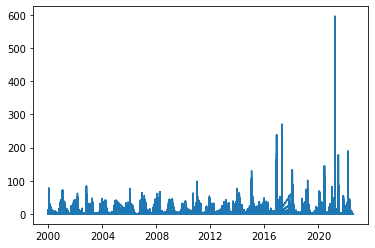

In [26]:
plt.plot(data['DATE'], data['PRECTOTCORR'])
plt.show()

In [48]:
#train data from 2000 - 2008 (:39451) test data from 2008 to 2016 (39452:80731)
train = data.iloc[:39451]
test = data.iloc[39451:80731] 
train = train[['DATE','PRECTOTCORR']]
test = test[['DATE','PRECTOTCORR']]
train.columns = ['ds', 'y']
test.columns = ['ds', 'y']

In [44]:
test.head()


,ds,y
39451,2008-01-02,0.00
39452,2008-01-03,22.11
39453,2008-01-04,2.11
39454,2008-01-05,0.00
39455,2008-01-06,0.00


## Train Model

In [49]:
model = NeuralProphet()
model.fit(train)

ValueError: ignored